# Frequent nouns WE

This notebook uses frequency sorting by the frequency of word forms.

In [1]:
import pandas as pd
import numpy as np

We extracted a list of most frequently used nouns and we can merge them with the WE of FlauBERT.

In [2]:
top_freq_n = pd.read_csv('Most Frequent Words/freq_NOUN.csv', index_col='Word')[:1000]

In [3]:
top_freq_n

,lemme,cgram,freq
Word,,,
chose,chose,NOM,1321.79
temps,temps,NOM,1031.05
vie,vie,NOM,986.59
fois,fois,NOM,899.25
peu,peu,NOM,894.78
...,...,...,...
fleur,fleur,NOM,25.20
tâche,tâche,NOM,25.20
page,page,NOM,25.16


In [4]:
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0)

Out of 1000 most popular nouns, 899 have their own embedding. We can merge them into one DataFrame.

In [5]:
freq_n_we = all_n_we.merge(top_freq_n, left_index=True, right_index=True)
freq_n_we

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,gn,gender,lemme,cgram,freq
accident,4.179721,2.913542,1.124980,2.269820,0.573966,-3.254911,-2.611606,-1.138910,5.944216,-1.380369,...,-4.042934,-4.985970,-4.890944,5.891779,-3.223269,singular,masculine,accident,NOM,100.11
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-1.511964,-3.012614,-2.688764,-5.424189,-6.660925,singular,masculine,accord,NOM,761.77
acte,5.714411,-3.455246,1.156246,0.894613,-2.072708,1.619847,-2.930497,-1.164060,1.456195,-3.298590,...,-3.608866,-1.903922,-1.031769,1.625798,-3.859723,singular,masculine,acte,NOM,39.19
acteur,0.352020,-1.348012,1.954639,3.082513,1.412622,-1.367935,-0.166175,4.955209,-0.182568,0.906105,...,-3.709120,-2.108225,-4.099033,2.540972,-4.782788,singular,masculine,acteur,NOM,30.51
action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,1.607074,...,-3.168099,-2.357484,-0.797240,3.015040,0.167511,singular,feminine,action,NOM,49.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étranger,1.755132,-5.339793,4.949425,-0.750269,-1.188016,-3.270611,-1.557013,0.745830,0.990242,-4.882980,...,-5.411729,-4.134318,-4.179949,2.748512,-2.673116,singular,masculine,étranger,NOM,35.72
études,3.155492,-0.104454,6.523874,-1.430581,-6.250263,-8.157872,-2.711711,-0.706295,-1.090734,-4.388298,...,-0.157389,-3.474527,-5.923344,5.456683,-5.749627,plural,feminine,étude,NOM,32.87
été,3.416338,-0.773585,1.706465,-0.731093,-2.286620,-4.172235,0.249760,2.382637,-0.532811,-1.754951,...,-7.156822,-2.926212,-7.060628,4.555850,-4.830541,singular,masculine,été,NOM,61.80
être,0.166950,-1.121742,3.855680,0.846314,-3.065409,0.577782,1.696410,0.962429,1.131322,-5.577701,...,-4.168539,-1.392100,-5.050613,1.669239,-4.337866,singular,masculine,être,NOM,78.78


We can also create a dataframe with WE of all available nouns and their frequencies, having approximately 11K nouns WE available:

In [6]:
all_nouns_with_freq = pd.read_csv('Most Frequent Words/freq_NOUN.csv', index_col='Word')
all_n_we_with_freq = all_n_we.merge(all_nouns_with_freq, left_index=True, right_index=True).sort_values(by='freq', ascending=False)
all_n_we_with_freq

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,gn,gender,lemme,cgram,freq
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,-3.652611,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-5.433400,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-4.145829,-2.843595,-0.272411,6.411278,3.698102,plural,feminine,fois,NOM,899.25
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-6.548421,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-1.731649,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
défavorisées,1.599458,-3.923379,3.842575,-1.052597,0.633553,-8.441103,1.014194,0.848815,-2.449038,-0.484702,...,-0.629580,-5.877977,-3.009192,-3.048039,0.089558,plural,feminine,défavorisé,NOM,0.00
lance,-0.239040,-1.693607,-2.678664,-5.860327,-1.227262,-1.246115,-5.117473,-3.049661,0.943785,0.524130,...,-3.786868,-5.013051,-6.991479,4.569996,-3.260848,singular,feminine,lanc,NOM,0.00
bâtis,9.313480,-4.772968,6.019509,-2.576473,2.456576,-1.731474,-6.341152,0.467244,-1.607576,2.052232,...,-0.862896,-4.340229,-0.018278,-2.536395,-5.089347,plural,masculine,bâti,NOM,0.00
lances,2.881022,-2.414575,-3.748237,-6.600061,1.730830,-2.279229,-0.611839,-3.858584,-0.699605,-0.986922,...,-2.180174,-5.366874,-3.419672,2.270778,-4.464878,plural,feminine,lanc,NOM,0.00


# Frequency dimension

There was an assumption that dimensions 371 and 52 can be correlated to frequency. We can look at the correlations of these dimensions with `freqlemlivres`:

In [7]:
all_n_we_with_freq.loc[:, [ '52', '371', 'freq']].corr()

,52,371,freq
52,1.000000,-0.678549,-0.066334
371,-0.678549,1.000000,0.070446
freq,-0.066334,0.070446,1.000000


The correlation between the dimension values and the frequency values is not strong. We can try to find a dimension with the strongest correlation with the values of the frequency column.

In [8]:
freq_corr_df = pd.DataFrame(columns=['corr_with_freq'])
freq_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    freq_list.append(all_n_we_with_freq.loc[:, [str(i), 'freq']].corr().iloc[0][-1])

# Use the list values as 
freq_corr_df['corr_with_freq'] = freq_list
freq_corr_df['sign'] = np.sign(freq_corr_df['corr_with_freq'])
freq_corr_df['abs'] = abs(freq_corr_df['corr_with_freq'])
freq_corr_df

,corr_with_freq,sign,abs
0,-0.057659,-1.0,0.057659
1,0.032799,1.0,0.032799
2,-0.010318,-1.0,0.010318
3,-0.085961,-1.0,0.085961
4,-0.035817,-1.0,0.035817
...,...,...,...
507,-0.108719,-1.0,0.108719
508,0.024339,1.0,0.024339
509,-0.039353,-1.0,0.039353
510,0.013600,1.0,0.013600


In [9]:
freq_corr_df.sort_values('abs').iloc[-20:]

,corr_with_freq,sign,abs
19,-0.083655,-1.0,0.083655
137,0.084678,1.0,0.084678
324,-0.085517,-1.0,0.085517
143,-0.085761,-1.0,0.085761
3,-0.085961,-1.0,0.085961
338,-0.087752,-1.0,0.087752
227,-0.088017,-1.0,0.088017
487,-0.088570,-1.0,0.088570
286,-0.090134,-1.0,0.090134
436,-0.090317,-1.0,0.090317


We can see that even the dimensions with highest correlation to the frequency column is very low.

This experiment doesn't allow us to establish a strong correlation with frequency for any dimension.

# Dimensions with highest and lowest avg

We can make an assumption that dimensions that have highest or lowest values can be representative of noun-ness.

For the experiment with dimensions we will take the most frequent nouns which as well *can't be interpreted as verb* (as seen above, one of the most common nouns is `être` which will potentially has dimensions both representing nouns and verbs).

For this we will first the list of nouns and verbs and find the nouns that are uniquely in the list of nouns.

In [10]:
top_freq_v = pd.read_csv('Most Frequent Words/freq_VERB.csv', index_col='Word')
top_freq_v

,lemme,cgram,freq
Word,,,
est,être,VER,19417.69
a,avoir,VER,5498.34
va,aller,VER,3382.55
fait,faire,VER,2751.99
faire,faire,VER,2735.96
...,...,...,...
évoquât,évoquer,VER,0.00
ôtai,ôter,VER,0.00
ôterions,ôter,VER,0.00


In [11]:
unique_freq_n_we = all_n_we_with_freq[~all_n_we_with_freq.index.isin(top_freq_v.index)][:1000]
unique_freq_n_we

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,gn,gender,lemme,cgram,freq
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,-3.652611,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-5.433400,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-4.145829,-2.843595,-0.272411,6.411278,3.698102,plural,feminine,fois,NOM,899.25
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-6.548421,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-1.731649,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
automne,-0.029326,-0.036336,0.344609,-0.301527,0.684155,-6.712758,-3.392828,2.657732,1.260150,-1.908536,...,-5.934503,-5.079613,-7.423095,1.560418,-3.776791,singular,masculine,automne,NOM,16.88
épreuve,6.970472,-2.010744,-1.955998,2.723860,-0.557150,-3.321700,-6.661906,2.171666,6.520999,3.122446,...,-5.723488,-1.765704,-3.225074,9.298415,-7.502809,singular,feminine,épreuve,NOM,16.88
ouverture,1.632854,-5.630388,-0.904949,-9.000515,-2.489218,-6.606404,-1.868740,4.467050,4.600908,2.660018,...,-3.898089,-4.613536,-3.238379,2.250607,-7.138097,singular,feminine,ouverture,NOM,16.87
feuilles,5.454817,-1.130333,-3.514142,-0.405661,2.975579,-5.276052,-3.652234,-4.060199,-0.086248,-3.856465,...,-3.117899,1.166877,-1.940229,-1.056504,1.370045,plural,feminine,feuille,NOM,16.86


We will also add PoS encoding for nouns as `1`:

In [12]:
unique_freq_n_we['pos'] = 1

## Dimensions with the highest average

Now that we have a dataframe, containing words that serve as nouns only and are relatively frequent, we can analyse the dimensions. First, we can find top 5 dimensions with the highest values:

In [13]:
unique_freq_n_we.loc[:, :'511'].mean().sort_values()[-5:]

326     6.112567
195     6.161914
44      6.890585
250     9.971999
371    38.293505
dtype: float64

Some of the dimensions we have previously seen as having the highest values: `371`, `250`, `44`, `195`: [here](https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Morphalou3/Investigating%20noun%20dimensions.ipynb).

Dimension `326` was not previously investiagted, we can have a look at the top 20 nouns with highest values in the dimension `326` and botton 20 nouns with the lowest values in `326`:

In [14]:
unique_freq_n_we['326'].sort_values()[-20:]

cheveux      11.844670
rang         11.855828
vêtements    11.919466
fer          11.950474
manière      12.191846
métier       12.193498
photos       12.265883
objet        12.278166
fleurs       12.279531
poil         12.297997
collier      12.309678
acteurs      12.334369
nana         12.570558
chemise      12.968505
visage       13.011158
position     13.245049
pantalon     13.465014
liaison      14.214938
habits       14.582494
fil          15.256657
Name: 326, dtype: float64

In [15]:
unique_freq_n_we['326'].sort_values()[:20]

whisky        -2.921939
adieu         -1.946858
version       -1.823464
études        -1.676383
intention     -1.597302
morceau       -1.195826
appel         -1.108422
piano         -1.041820
université    -0.892076
quart         -0.810918
for           -0.775186
chant         -0.739744
américains    -0.516593
cri           -0.510924
étudiants     -0.438738
pire          -0.350398
test          -0.325665
notes         -0.248693
origine       -0.022329
prisonniers    0.031338
Name: 326, dtype: float64

## Dimensions with the lowest average

In [16]:
unique_freq_n_we.loc[:, :'511'].mean().sort_values()[:5]

52    -10.600959
274    -8.559077
181    -6.139393
470    -6.002410
138    -5.765709
dtype: float64

Example of nouns for highest and lowest values of `52`, `274` and `138` can be found [here](https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Morphalou3/Investigating%20noun%20dimensions.ipynb).

Dimensions `181` and `470` were not looked at before and we can look at them righ now.

### Dimension 181

In [17]:
unique_freq_n_we['181'].sort_values()[-20:]

amitié     -1.267396
bonne      -1.084154
abri       -0.843479
coin       -0.834102
frigo      -0.768757
parc       -0.710242
dossiers   -0.695855
placard    -0.568356
feuilles   -0.506102
parking    -0.497687
crème      -0.418334
version    -0.357029
lac        -0.313054
cirque     -0.215596
bière      -0.097153
patience   -0.076469
fromage     0.341992
tort        0.922191
merci       1.377761
lien        3.101926
Name: 181, dtype: float64

In [18]:
unique_freq_n_we['181'].sort_values()[:20]

poupée       -13.147191
seins        -13.125753
ordinateur   -12.985024
pantalon     -12.581136
visage       -12.477160
avion        -12.297463
garçons      -12.292806
vêtements    -12.022993
nuages       -11.975925
appareil     -11.881238
chaussures   -11.872410
bébés        -11.852094
habits       -11.795027
lunettes     -11.535264
bébé         -11.427254
tête         -11.280148
train        -11.264141
rats         -11.242051
veste        -11.236717
empereur     -11.225712
Name: 181, dtype: float64

We can notice that all values of dimension `181` are negative and we can hypothesise that positive values of this dimension can correspond to non-nouns.

### Dimenension 470

In [19]:
unique_freq_n_we['470'].sort_values()[-20:]

mandat         -0.629310
soirs          -0.579423
mademoiselle   -0.572184
carrière       -0.328480
ans            -0.243089
tout           -0.222029
quart          -0.060117
noms           -0.030399
dieux          -0.004031
mai             0.021403
membres         0.062413
instant         0.187658
million         0.396064
milliers        0.830936
existence       1.154799
mille           1.584001
millions        1.787577
fois            1.805952
centaines       1.821003
nombre          1.858350
Name: 470, dtype: float64

In [20]:
unique_freq_n_we['470'].sort_values()[:20]

porc       -15.963580
viande     -14.896247
fromage    -14.714665
oeufs      -13.415202
poisson    -13.270139
pain       -13.134651
miel       -12.932362
moteur     -12.834925
épreuve    -12.641128
poulet     -12.466574
pizza      -12.443261
blé        -12.349390
vin        -12.328328
plat       -12.235964
pierre     -12.195222
crème      -12.179840
foie       -11.754989
poule      -11.538135
alcool     -11.523900
chocolat   -11.410089
Name: 470, dtype: float64

## Dimensions with the lowest std

We can create a hypithesis that these dimensions with the lowest deviation, represent the noun-ness.

In [21]:
unique_freq_n_we.loc[:, :'511'].std().sort_values()[:5]

408    1.860107
508    1.865233
229    1.909907
158    1.977193
497    1.993609
dtype: float64

None of these dimensions were previously analysed.

# Testing the correlation of noun-ness

We now have 6 potential dimentions that hold the information about noun-ness: `181`, `508`, `408`, `229`, `497` and `158`.

We can test these dimensions for noun-ness by selecting top 1000 most frequent verbs (that can't be interpreted by nouns). For both nouns and verbs, we can create a column encoding the PoS: 1 for nouns and 0 for verbs. We can then check the correlation of each of the 6 dimensions with the PoS values.

First, we will create a DataFrame with words that are uniquely verbs:

In [22]:
all_v_we = pd.read_csv('all_verb_we.csv', index_col=0)
unique_freq_v_we = all_v_we.merge(top_freq_v[~top_freq_v.index.isin(all_nouns_with_freq.index)], left_index=True, right_index=True).sort_values(by='freq', ascending=False)[:1000]
unique_freq_v_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,cgram,freq
faire,-1.953992,1.967468,-0.867251,-3.512503,0.711001,-1.465487,-3.816191,-0.969798,0.693006,-2.629247,...,-2.268780,2.166715,-4.476788,-4.511813,-8.868004,-0.186564,-3.174611,faire,VER,2735.96
sais,0.833028,0.262184,-4.303301,-1.228006,2.932428,-3.804066,-2.402668,-0.564615,-3.635561,-1.336695,...,-0.487414,-0.902436,-3.682986,-4.656565,-3.596141,-2.850661,-1.230298,savoir,VER,2492.92
veux,1.909130,1.314169,-2.582622,-7.257017,2.877503,-2.965186,-3.961409,-6.201593,-0.733923,0.565444,...,-5.809868,-1.167027,-4.419941,-3.083226,-4.695359,-4.843028,-2.858629,vouloir,VER,2486.93
ai,1.375040,0.351665,-3.261931,-0.827900,-0.663424,-7.868486,-1.336650,-4.201273,-7.791738,0.216940,...,-3.528767,2.179918,-8.119091,-3.079983,-1.413256,0.309939,-0.601137,avoir,VER,2475.78
était,-0.360612,3.057447,-1.896422,0.758237,-3.636281,-5.099815,-2.400843,1.776186,-3.402864,1.588920,...,-4.151774,-0.533358,-3.817090,-3.953760,-5.238096,-0.236460,-3.574182,être,VER,2356.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vise,0.571494,-2.826918,1.862426,-3.573292,-1.220379,-3.292572,0.165798,0.843226,1.056491,-0.542817,...,-1.093498,-1.613618,-3.346600,-3.003185,-3.671720,-2.961078,-4.112127,viser,VER,13.96
diriger,-2.597307,1.046078,0.396200,1.359129,-2.464565,0.890573,1.203737,0.857030,1.990158,-3.986770,...,-2.992666,0.838197,-1.756418,-5.210673,-4.461704,0.555919,-5.029737,diriger,VER,13.94
organiser,-3.487982,-0.044396,0.855691,1.090287,0.575098,-2.096214,-2.194631,-1.565821,0.929013,-3.366896,...,-0.052813,3.942301,-0.770194,-3.442216,-3.223171,-0.091084,-4.142995,organiser,VER,13.93
pensons,0.423341,-0.972839,1.267903,-0.234426,2.370369,-0.144255,0.473892,2.735201,0.024333,-2.812480,...,-6.520752,1.106622,-4.984591,-5.698886,-10.963478,-0.293781,-1.509404,penser,VER,13.89


In [23]:
unique_freq_v_we['pos'] = 0

Now we can merge the DataFrame of words that are uniquely nouns and uniquely verbs and construct a new dimension of PoS encoding.

In [24]:
unique_n_and_v_we = pd.concat([unique_freq_n_we, unique_freq_v_we])

In [25]:
unique_n_and_v_we

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,gn,gender,lemme,cgram,freq,pos
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79,1
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59,1
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-2.843595,-0.272411,6.411278,3.698102,plural,feminine,fois,NOM,899.25,1
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31,1
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vise,0.571494,-2.826918,1.862426,-3.573292,-1.220379,-3.292572,0.165798,0.843226,1.056491,-0.542817,...,-3.003185,-3.671720,-2.961078,-4.112127,NaN,NaN,viser,VER,13.96,0
diriger,-2.597307,1.046078,0.396200,1.359129,-2.464565,0.890573,1.203737,0.857030,1.990158,-3.986770,...,-5.210673,-4.461704,0.555919,-5.029737,NaN,NaN,diriger,VER,13.94,0
organiser,-3.487982,-0.044396,0.855691,1.090287,0.575098,-2.096214,-2.194631,-1.565821,0.929013,-3.366896,...,-3.442216,-3.223171,-0.091084,-4.142995,NaN,NaN,organiser,VER,13.93,0
pensons,0.423341,-0.972839,1.267903,-0.234426,2.370369,-0.144255,0.473892,2.735201,0.024333,-2.812480,...,-5.698886,-10.963478,-0.293781,-1.509404,NaN,NaN,penser,VER,13.89,0


In [26]:
unique_n_and_v_we.loc[:, [ '181', '508', '408', '229', '497', '158', 'pos']].corr()

,181,508,408,229,497,158,pos
181,1.000000,0.016654,-0.052839,-0.013247,0.074591,0.022839,-0.108830
508,0.016654,1.000000,0.054116,-0.035153,0.071824,0.202147,0.308473
408,-0.052839,0.054116,1.000000,0.068803,-0.007983,-0.047003,-0.013199
229,-0.013247,-0.035153,0.068803,1.000000,-0.007792,-0.172577,-0.193856
497,0.074591,0.071824,-0.007983,-0.007792,1.000000,0.069236,0.046234
158,0.022839,0.202147,-0.047003,-0.172577,0.069236,1.000000,0.323627
pos,-0.108830,0.308473,-0.013199,-0.193856,0.046234,0.323627,1.000000


Dimension `508` seems to have the strongest correlation with PoS values, however, the correlation is not the very strong as well.

# Finding dimensions with highest correlation to PoS values

Now for the top frequent nouns and verbs, we can go through all the dimensions and find the correlation of each  dimension with the PoS values: 0 for verbs and 1 for nouns.

In [27]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_n_and_v_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
222,-0.408797,-1.0,0.408797
37,-0.411967,-1.0,0.411967
375,0.417988,1.0,0.417988
65,-0.425825,-1.0,0.425825
89,-0.426476,-1.0,0.426476
346,0.427125,1.0,0.427125
168,-0.428188,-1.0,0.428188
458,0.437890,1.0,0.437890
57,-0.439132,-1.0,0.439132
31,0.447914,1.0,0.447914


In [28]:
pos_corr_dim_freq = pos_corr_freq_df.sort_values('abs')[-10:].index

Unlike in experiment before, we can see a new unseen dimension `462` emerging at the list of top correlated dimensions.

We can repeat the experiment on all unique nouns and verbs to see if this dimension is still highly correlated to PoS information:

In [29]:
unique_verbs = top_freq_v[~top_freq_v.index.isin(all_nouns_with_freq.index)]
unique_verbs_we = all_v_we.merge(unique_verbs, left_index=True, right_index=True)
unique_verbs_we['pos'] = 0

unique_nouns = all_nouns_with_freq[~all_nouns_with_freq.index.isin(top_freq_v.index)]
unique_nouns_we = all_n_we.merge(unique_nouns, left_index=True, right_index=True)
unique_nouns_we['pos'] = 1

all_unique = pd.concat([unique_verbs_we, unique_nouns_we])

In [30]:
pos_corr_all_df = pd.DataFrame(columns=['corr_with_pos'])

pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(all_unique.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_all_df['corr_with_pos'] = pos_list
pos_corr_all_df['sign'] = np.sign(pos_corr_all_df['corr_with_pos'])
pos_corr_all_df['abs'] = abs(pos_corr_all_df['corr_with_pos'])
pos_corr_all_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
282,0.340653,1.0,0.340653
479,-0.353590,-1.0,0.353590
212,-0.353986,-1.0,0.353986
198,0.362031,1.0,0.362031
362,-0.372121,-1.0,0.372121
65,-0.377942,-1.0,0.377942
31,0.378955,1.0,0.378955
192,0.381596,1.0,0.381596
341,-0.383088,-1.0,0.383088
305,-0.389222,-1.0,0.389222


In [31]:
pos_corr_dim_all = pos_corr_freq_df.sort_values('abs')[-10:].index

Interestingly, if we're looking at all unique nouns and verbs without consideration for their frequency, dimensions `504` (previously not seen) and `401` become much more correlated with PoS, unlike most of other dimensions having a weaker correlation when less frequent verbs and nouns are included.

Dimensions `462` (previously in top #1 of most correlated dimension, here not even in top #20) and `282` and `198` become less correlated with PoS information when less frequent words are added which can be a sign of these dimensions relying on some co-occurence information to be correlated with Pos information. 

Dimensions `159` and `480` remain one of the strongest correlated dimensions to PoS both for frequent and all words, which can be a sign that these dimensions encode some fundamental information about verbs/nouns which can be recognized by NN even for less frequent words.

# WE mean and WE std

We can hypothesise that not only a dimension value can be correspondent to a PoS information but a mean value of all dimensions of a WE can be holding a connection to its PoS: since potentially multiple dimensions are correspondant to PoS. And similarly, the row's std could be related to the PoS as well.

To test this we will first create `mean` and `std` columns:

In [32]:
unique_n_and_v_we['mean'] = unique_n_and_v_we.loc[:, :'511'].mean(axis=1)
unique_n_and_v_we['std'] = unique_n_and_v_we.loc[:, :'511'].std(axis=1)
unique_n_and_v_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,lemme,cgram,freq,pos,mean,std
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79,1,-0.086412,3.691967
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-0.613292,1.389376,singular,feminine,vie,NOM,986.59,1,-0.192779,3.670620
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,6.411278,3.698102,plural,feminine,fois,NOM,899.25,1,-0.133329,3.709590
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-3.374631,-5.006559,singular,masculine,père,NOM,879.31,1,-0.213956,3.612786
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91,1,0.027297,3.614695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vise,0.571494,-2.826918,1.862426,-3.573292,-1.220379,-3.292572,0.165798,0.843226,1.056491,-0.542817,...,-2.961078,-4.112127,NaN,NaN,viser,VER,13.96,0,0.100711,3.921409
diriger,-2.597307,1.046078,0.396200,1.359129,-2.464565,0.890573,1.203737,0.857030,1.990158,-3.986770,...,0.555919,-5.029737,NaN,NaN,diriger,VER,13.94,0,-0.107744,3.538539
organiser,-3.487982,-0.044396,0.855691,1.090287,0.575098,-2.096214,-2.194631,-1.565821,0.929013,-3.366896,...,-0.091084,-4.142995,NaN,NaN,organiser,VER,13.93,0,0.232700,3.625111
pensons,0.423341,-0.972839,1.267903,-0.234426,2.370369,-0.144255,0.473892,2.735201,0.024333,-2.812480,...,-0.293781,-1.509404,NaN,NaN,penser,VER,13.89,0,-0.186275,3.496759


In [33]:
unique_n_and_v_we.loc[:, ['pos', 'mean', 'std']].corr()

,pos,mean,std
pos,1.000000,-0.026970,0.269545
mean,-0.026970,1.000000,0.218912
std,0.269545,0.218912,1.000000


Even though the correlation is not as strong as have been seen above, there is slight correlation between PoS and standard deviation of values of a WE.

# Constructing an average vector for nouns and verbs

We can construct an average WE for our set of unique frequent nouns and then one for unique frequent verbs.

We can use this to find the closest and furthest dimensions between the 2 average vectors. For closest dimensions of an average noun and verb WE, we can assume that they don't encode PoS information and can be ignored. Contrary, the dimensions with furthest distance between dimensions can be considered for containing PoS information.

Let's start by constructing the average WE vectors:

In [34]:
avg_n = unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'NOM'].loc[:, :'511'].mean()
avg_n

0      2.147730
1     -1.642748
2      0.458879
3     -1.525075
4      0.807112
         ...   
507   -3.889314
508   -3.024137
509   -3.678226
510    1.704189
511   -2.570454
Length: 512, dtype: float64

In [35]:
avg_v = unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'VER'].loc[:, :'511'].mean()
avg_v

0      1.473284
1     -0.299126
2     -0.131543
3     -1.068302
4      0.578899
         ...   
507   -3.626909
508   -4.184445
509   -5.102227
510    0.270473
511   -2.614982
Length: 512, dtype: float64

Now we can find difference between the two:

In [36]:
diff = abs(avg_n - avg_v)
diff.sort_values()[:10]

367    0.003473
350    0.004178
385    0.005239
422    0.010430
47     0.015497
391    0.024255
474    0.032262
54     0.032404
498    0.032589
440    0.038429
dtype: float64

Dimension `367` appears to be the one with the lowest difference between nouns and verbs, meaning the information there is very unlikely to be PoS related and indeed we haven't see any of these dimensions in our previous analysis of dimensions for PoS information.

In [37]:
diff.sort_values()[-10:]

159    2.857245
29     2.883178
462    2.883574
192    2.955441
282    2.975346
341    3.067936
310    3.179596
480    3.550972
198    3.554250
371    3.829593
dtype: float64

We can see the results here beeing polluted by dimension `371` appearing as of one of the dimensions with the biggest difference in values between nouns and verbs. 

Other dimensions seemingly previously appeared in the high correlation analysis. 

Once again, all the dimensions have previously appeared during the correlation analysis and potentially this experiment can be used to predict correlation.

# Investigating the dimensions

We can now have a look at the dimensions that appear most frequently appearing dimensions:

In [38]:
high_corr_dims = set(pos_corr_dim_all).union(set(pos_corr_dim_freq))

In [39]:
high_corr_dims = set(map(lambda x: str(x), high_corr_dims))

We will analyze dimensions that previously appeared in either top 10 most correlated dimensions for most frequent words or all words and as well appeared in the dimensions with biggest diffences between values of average vector for nouns and verbs:

In [40]:
high_corr_dims

{'159', '192', '198', '282', '29', '310', '341', '401', '462', '480'}

We can have a look at the nouns and verbs that have the highest and lowest values in this dimensions to validate whether or not these dimensions can be correspondant to PoS.

Before proceeding we can have a look at the correlation of the dimensions between themselves and with PoS information:

In [41]:
unique_n_and_v_we.loc[:, ['29', '159', '192', '198', '282', '310', '341', '401', '462', '480', 'pos']].corr()

,29,159,192,198,282,310,341,401,462,480,pos
29,1.000000,0.404166,-0.415413,-0.392600,-0.306374,0.389057,0.372838,0.282969,-0.296297,-0.421450,-0.502173
159,0.404166,1.000000,-0.468207,-0.263244,-0.305883,0.424673,0.267362,0.296398,-0.250185,-0.454845,-0.543172
192,-0.415413,-0.468207,1.000000,0.177357,0.169868,-0.338355,-0.199752,-0.222443,0.251214,0.384192,0.494389
198,-0.392600,-0.263244,0.177357,1.000000,0.522062,-0.259180,-0.326960,-0.449333,0.319750,0.327839,0.508086
282,-0.306374,-0.305883,0.169868,0.522062,1.000000,-0.307291,-0.285612,-0.446130,0.291206,0.324802,0.499051
310,0.389057,0.424673,-0.338355,-0.259180,-0.307291,1.000000,0.301786,0.443196,-0.403365,-0.493214,-0.476765
341,0.372838,0.267362,-0.199752,-0.326960,-0.285612,0.301786,1.000000,0.384549,-0.368916,-0.324868,-0.490506
401,0.282969,0.296398,-0.222443,-0.449333,-0.446130,0.443196,0.384549,1.000000,-0.387061,-0.258587,-0.482216
462,-0.296297,-0.250185,0.251214,0.319750,0.291206,-0.403365,-0.368916,-0.387061,1.000000,0.349837,0.575263
480,-0.421450,-0.454845,0.384192,0.327839,0.324802,-0.493214,-0.324868,-0.258587,0.349837,1.000000,0.573627


The previously un-inspected dimension seems to be correlated the most with the dimension `310`.

Dimensions `198` and `282` have the strongest correlation between each other, followed by `159` and `192`. As was seen above, both `198` and `282` become less correlated to PoS information, and we can make a hypothesis that this dimension encodes certain information about co-occurences leading to lower correlation with PoS for words that appear in the corpus less frequently.

### Dimension 29

We will start with dimension `29` and we can have a look at the distribution of values of the dimension for nouns:

In [42]:
unique_freq_n_we.loc[:, '29'].describe()

count    1000.000000
mean       -2.696012
std         2.611189
min       -10.220727
25%        -4.485969
50%        -2.698120
75%        -0.923143
max         5.955313
Name: 29, dtype: float64

And for verbs:

In [43]:
unique_freq_v_we.loc[:, '29'].describe()

count    1000.000000
mean        0.187166
std         2.349369
min        -8.342939
25%        -1.315569
50%         0.278135
75%         1.737546
max         7.046504
Name: 29, dtype: float64

Verbs have an average value close to 0 while nouns seem to have more negative values in the dimension. Verbs as well seem to have a lower deviation in this dimension. We can try plotting the distributions:

In [44]:
import matplotlib.pyplot as plt

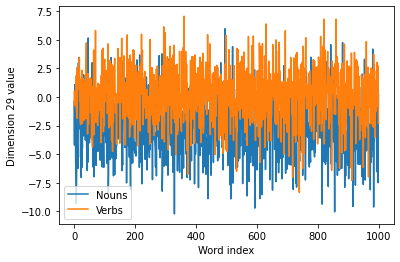

In [45]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '29'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '29'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 29 value')
plt.legend()

Since in general verbs have higher values in this dimension, we can have a look at outlier verbs that have lowest values in the dimension:

In [46]:
unique_freq_v_we.loc[:, '29'].sort_values()[:20]

ferons      -8.342939
libéré      -7.302123
espérons    -7.008895
menacé      -6.989449
retrouvé    -6.762147
rêvé        -6.493288
range       -6.416291
enlevé      -6.247370
habille     -6.232849
marqué      -6.208606
ailles      -6.144728
annoncer    -6.063216
disant      -5.712711
ouverte     -5.188507
ouvert      -5.058407
inquiétez   -5.032975
croyait     -5.006827
laissons    -4.951976
trouvée     -4.924291
ordonne     -4.876775
Name: 29, dtype: float64

We can see a high number of verb forms that could be used as nouns: `violée`, `retrouvée`, `libéré`... In addition to this we can notice certain lexical theme (e.g. crime-related): (`libéré`, `armé`, `violée`, `enlevé`...).

We can also have a look at nouns that have higher values in the dimension:

In [47]:
unique_freq_n_we.loc[:, '29'].sort_values()[-20:]

escalier       3.124671
honte          3.139924
mission        3.233436
gamin          3.287051
chant          3.293511
bateau         3.297194
malheur        3.376624
face           3.436967
bonjour        3.449964
gamins         3.468107
seul           3.610012
conneries      3.667524
taxi           3.764730
monseigneur    3.812551
fauteuil       4.178693
vélo           4.392204
tension        4.566526
demi-tour      4.742115
putain         5.152559
pression       5.955313
Name: 29, dtype: float64

We can see quite a lot of nouns that could be used as interjection: `putain`, `bonjour`, `monseigneur`, `madame`. As well as some nouns that can be another PoS: `moi`, `seul`. We can also notice that some of the nouns can be frequently used in adverb-like constructions like: `en face`, `à vélo`, `en taxi`... However, there is no common pattern for all these nouns.

We can also have a look at the verbs with high values and nouns with low values which are more typical:

In [48]:
unique_freq_v_we.loc[:, '29'].sort_values()[-20:]

monté          4.983005
réussi         5.010753
connaissez     5.122983
pleut          5.177567
arrives        5.277559
nager          5.288133
passent        5.317031
attraper       5.384334
monte          5.416920
foutu          5.435593
monter         5.476039
asseoir        5.526114
savent         5.603508
traverser      5.784987
regardez       5.796549
descendre      6.127767
crever         6.375151
connaissent    6.777395
plaindre       6.789680
assis          7.046504
Name: 29, dtype: float64

In [49]:
unique_freq_n_we.loc[:, '29'].sort_values()[:20]

poisson       -10.220727
crème         -10.040846
star           -9.712486
bible          -9.618677
nuages         -9.569301
sel            -9.369575
homme          -9.315256
fer            -8.908384
intention      -8.891602
seins          -8.887835
porc           -8.651791
chocolat       -8.534778
ordre          -8.409978
lait           -8.236251
cigarettes     -8.144197
miel           -8.113442
santé          -8.104095
information    -8.088715
viande         -7.921938
version        -7.893915
Name: 29, dtype: float64

There seem to be no particular outliers among

### Dimension 159

Dimension `159` has the highest correlation with PoS and we can have a look if it appears to be correct. 

In [50]:
unique_freq_n_we.loc[:, '159'].describe()

count    1000.000000
mean       -3.324208
std         2.482824
min       -11.522227
25%        -4.972248
50%        -3.424229
75%        -1.716802
max         3.860630
Name: 159, dtype: float64

In [51]:
unique_freq_v_we.loc[:, '159'].describe()

count    1000.000000
mean       -0.466964
std         1.897050
min        -5.783679
25%        -1.734217
50%        -0.487557
75%         0.741483
max         6.603064
Name: 159, dtype: float64

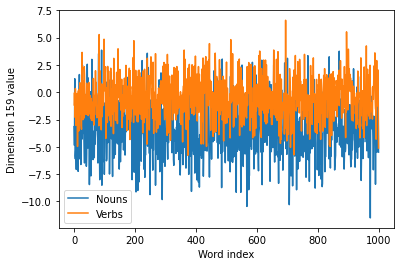

In [52]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '159'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '159'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 159 value')
plt.legend()

Here, the values of the dimension for verbs seem to be around 0, and values for nouns seem to be lower on general. We can also see that only 7% of nouns have a positive value in this dimension:

In [53]:
np.sum(np.array(unique_freq_n_we.loc[:, '159']) >= 0)/len(unique_freq_n_we.loc[:, '159'])

0.089

In comparison, 40% of verbs have a positive value in this dimension:

In [54]:
np.sum(np.array(unique_freq_v_we.loc[:, '159']) >= 0)/len(unique_freq_v_we.loc[:, '159'])

0.393

We can have a look at the outliers:

In [55]:
unique_freq_v_we.loc[:, '159'].sort_values()[:20]

retrouvé   -5.783679
tenté      -5.742928
cessé      -5.121214
nourrir    -5.054930
fais       -4.969552
guérir     -4.967141
cassé      -4.964467
prévenir   -4.915838
mangez     -4.861890
seras      -4.758932
sers       -4.749530
meurs      -4.740520
ravie      -4.683327
bu         -4.557686
profiter   -4.464869
fumer      -4.464289
mangé      -4.409074
casser     -4.392937
mange      -4.335073
nager      -4.321104
Name: 159, dtype: float64

We can potentially attribute these low values in verbs for several factors:
- The verbs being transitive => `Tu le fais` and `je le mange` being interpretted as a noun
- There are also a lot of nouns in participe passé form: `tenté`/`retrouvé`/`cessé`/`mangé`/`bu` which are used with auxialry verbs which can lead to some misinterpretation by NN

In [56]:
unique_freq_n_we.loc[:, '159'].sort_values()[-20:]

mille           2.489603
seule           2.492659
heure           2.500959
heures          2.567712
uniforme        2.687804
unité           2.744563
madame          2.829990
mademoiselle    2.902764
émission        2.939903
côté            3.017199
lundi           3.043074
jeudi           3.112176
infos           3.193232
mercredi        3.251376
mardi           3.356649
semaine         3.526647
instant         3.546476
liste           3.578404
rang            3.764726
numéro          3.860630
Name: 159, dtype: float64

We can try to attribute the outlying high values of nouns to potential occurences of them without any article:
- Par numero(s) / par carte / par semaine
- à rang de / à côté de
- Madame and mademoiselle being used to adress someone without any article
- As well as ambiguous nouns `seule` or `uniforme` (can be adjective) 

However, there is no obvious grouping as to why these nouns are asigned higher values than average.

In [57]:
unique_freq_v_we.loc[:, '159'].sort_values()[-20:]

tenait        3.476013
joindre       3.534333
intéresse     3.539785
inquiétez     3.588386
indique       3.611022
regarde       3.656970
représente    3.720346
préparez      3.780652
assis         3.869297
appellent     3.872902
regardais     3.951928
occupe        3.985015
regardent     4.249136
regardé       4.460762
appelez       4.726689
raconté       4.828105
appeler       4.865578
attendez      5.290317
regardait     5.537718
travaillez    6.603064
Name: 159, dtype: float64

In [58]:
unique_freq_n_we.loc[:, '159'].sort_values()[:20]

miel        -11.522227
porc        -10.465917
parfum      -10.308782
lait         -9.839472
thé          -9.384512
soif         -9.175977
poulet       -9.174446
vin          -9.138720
princesse    -9.089209
bonheur      -9.004986
fruits       -8.943031
whisky       -8.937464
cochon       -8.786475
vache        -8.744326
chevaux      -8.696256
sel          -8.655915
bains        -8.579679
chien        -8.524145
pain         -8.521943
chocolat     -8.472916
Name: 159, dtype: float64

We can see transitive verbs again in the list of verbs with highest values (potentially the verbs that could be confused with nouns) as well as verbs in participe passé form.

We can still test the hypothesis of the correlation of this dimension values to transitivity of verbs later.

However, the theory of outlier nouns being there due to them frequently used without articles doesn't seem to hold: a lot of nouns with minimal values are frequently used without articles as well:
- au lait / au vin / au pain

Hence, it is probablu unlikely that the values of this dimension correspond to the co-occurence of a word with articles.

Despite the dimension being the highest correlated with PoS information of verbs and nouns, it's however, hard to evaluate by what reason the nouns and verbs are grouped and hard to interpret the nouns and verbs with outlier values.

### Dimension 192

In [59]:
unique_freq_n_we.loc[:, '192'].describe()

count    1000.000000
mean        3.539081
std         2.598816
min        -5.825426
25%         1.608879
50%         3.504112
75%         5.414344
max        11.593149
Name: 192, dtype: float64

In [60]:
unique_freq_v_we.loc[:, '192'].describe()

count    1000.000000
mean        0.583640
std         2.600080
min        -9.300445
25%        -0.994540
50%         0.603317
75%         2.238574
max         8.956486
Name: 192, dtype: float64

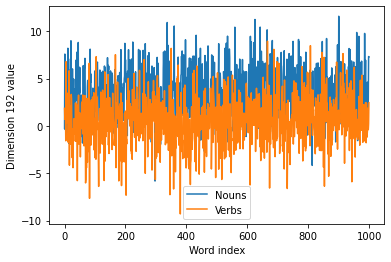

In [61]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '192'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '192'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 192 value')
plt.legend()

In this dimension, the nouns seem to have higher values in this dimension. Let's have a look at the outliers:

In [62]:
unique_freq_v_we.loc[:, '192'].sort_values()[-20:]

enterré      6.276480
cassé        6.334670
retrouvé     6.437855
perdue       6.518383
mourir       6.619886
survivre     6.635298
réfléchis    6.709782
fonce        6.748880
es           6.785803
abandonné    6.793352
continue     7.003475
rit          7.254833
penses       7.323476
tue          7.531543
brisé        7.643866
range        7.775387
parte        8.094633
né           8.197522
survécu      8.486043
née          8.956486
Name: 192, dtype: float64

We can see the similarity in the outliers of this dimension to above: a lot ot participe passé word forms.

In [63]:
unique_freq_n_we.loc[:, '192'].sort_values()[:20]

mesdames      -5.825426
studio        -4.171311
habitude      -3.287951
minuit        -2.686276
semaine       -1.953934
occasion      -1.951697
monsieur      -1.845847
monseigneur   -1.830752
madame        -1.807068
dimanche      -1.713486
aise          -1.706715
frigo         -1.697270
moment        -1.645507
messieurs     -1.617931
morceau       -1.599807
exercice      -1.551914
instant       -1.501455
week-end      -1.496630
appareil      -1.489028
concert       -1.470835
Name: 192, dtype: float64

Similarly, for nouns the outliers include the words that can be used to address someone:
- `Mesdames`, `monsieur`, `monseigneur`, `madame`, `messieurs` 

However, the grouping for other nouns is less obvious.

And if we look highest vlaues for verbs and lowest for nouns:

In [64]:
unique_freq_n_we.loc[:, '192'].sort_values()[-20:]

bleu          8.923435
suspect       8.936839
argent        9.000732
science       9.028357
balles        9.106495
cancer        9.135464
meurtrier     9.238809
intérêts      9.468428
seins         9.470066
droits        9.488717
pierre        9.581899
biens         9.778303
effets        9.878656
crédit       10.154316
zéro         10.435883
pierres      10.445419
clés         10.561643
maladie      10.930956
théorie      11.251228
blessures    11.593149
Name: 192, dtype: float64

In [65]:
unique_freq_v_we.loc[:, '192'].sort_values()[:20]

oubliez     -9.300445
attendez    -7.654397
écoutez     -7.321049
essayez     -7.269154
passez      -6.661512
comptez     -6.615705
imaginez    -6.565384
arrêtez     -6.391367
commencez   -6.371938
soyez       -6.305080
préparez    -6.239012
entendez    -6.196218
laissez     -6.022510
perdez      -5.902468
restez      -5.812983
savez       -5.785270
devez       -5.768063
aidez       -5.667215
regardez    -5.661911
revenez     -5.661589
Name: 192, dtype: float64

Interestingly, the typical verbs are all in 2nd person plural. This information together with the outlier nouns that are used for address: it could be a sign of a more formal context where these words are used.

### Dimension 198

Description of dimension 198 for nouns:

In [66]:
unique_freq_n_we.loc[:, '198'].describe()

count    1000.000000
mean        4.184586
std         3.038179
min        -4.145070
25%         2.231845
50%         4.159069
75%         6.044223
max        16.710394
Name: 198, dtype: float64

Description of dimension 198 for verbs:

In [67]:
unique_freq_v_we.loc[:, '198'].describe()

count    1000.000000
mean        0.630337
std         2.989798
min        -7.701423
25%        -1.451657
50%         0.681707
75%         2.575973
max        14.067154
Name: 198, dtype: float64

This is the second dimension which could potentially be corresponding to PoS information where mean of verb dimension values is close to 0. 

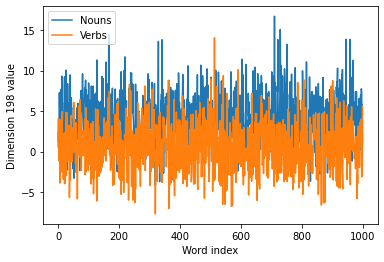

In [68]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '198'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '198'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 198 value')
plt.legend()

Outliers:

In [69]:
unique_freq_v_we.loc[:, '198'].sort_values()[-20:]

couvre       6.960756
utilisé      7.166574
créé         7.170422
acheter      7.437881
pouvons      7.500731
utiliser     7.721810
joindre      8.011379
portez       8.092013
envoyer      8.094077
pourriez     8.303205
couvrir      8.323973
aidera       8.539452
rempli       8.742768
demandez     8.759162
offrir       8.804786
remplir      8.861746
aidé         8.971918
envoyez      9.369053
appelée     10.105935
offert      14.067154
Name: 198, dtype: float64

In [70]:
unique_freq_n_we.loc[:, '198'].sort_values()[:20]

meilleur    -4.145070
toilettes   -3.735212
moi         -3.657421
cadavres    -3.506686
pire        -3.475411
fuite       -3.458852
suite       -3.291219
son         -2.844270
prison      -2.786444
meurtrier   -2.778991
couilles    -2.719298
justice     -2.665809
traître     -2.632951
flics       -2.500388
juifs       -2.372765
boulot      -2.344165
bains       -2.338661
flic        -2.336440
coup        -2.251112
ville       -2.150387
Name: 198, dtype: float64

Typical nouns and verbs:

In [71]:
unique_freq_v_we.loc[:, '198'].sort_values()[:20]

réveille    -7.701423
regrette    -7.050304
respire     -6.774652
arrives     -6.674252
démarre     -6.608154
sonne       -6.536116
décide      -6.513648
habille     -6.351778
échappe     -6.308565
raconte     -6.308418
rentre      -6.109454
abandonne   -6.035025
déteste     -5.996676
rend        -5.991282
rester      -5.844096
reprend     -5.817455
attendent   -5.760402
arrête      -5.670000
quitte      -5.473987
boit        -5.361661
Name: 198, dtype: float64

In [72]:
unique_freq_n_we.loc[:, '198'].sort_values()[-20:]

couverture    10.424542
énergie       10.586262
courrier      10.641223
tableau       10.668655
émission      10.760877
espèce        11.058411
serpent       11.068368
messages      11.268724
dollars       11.311361
chaîne        11.407549
boîte         11.694752
océan         13.236157
poisson       13.608801
fil           13.807056
chèque        13.815483
anneau        13.850446
collier       13.879416
message       14.441530
lien          15.069812
assurance     16.710394
Name: 198, dtype: float64

 We can notice that positive values for nouns and verbs share the same roots: we can see in verb outliers `couvre`, `couvrir` and then in typical nouns we see `couverture`. `Offrir`/`offert`, `envoyer`/`envoyez` also have close values in the dimension. This can potentially be a sign of the dimension encoding root/semantical information.

### Dimension 282

Description of dimension `282` for nouns:

In [73]:
unique_freq_n_we.loc[:, '282'].describe()

count    1000.000000
mean        0.970221
std         2.573314
min        -8.804429
25%        -0.743145
50%         1.061814
75%         2.703665
max         8.619900
Name: 282, dtype: float64

Description of dimension `282` for verbs: 

In [74]:
unique_freq_v_we.loc[:, '282'].describe()

count    1000.000000
mean       -2.005125
std         2.595731
min       -11.173955
25%        -3.697416
50%        -2.022160
75%        -0.194004
max         7.214352
Name: 282, dtype: float64

Once again we can see that the values of the dimension for verbs are close to 0.

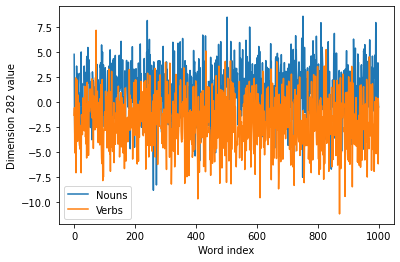

In [75]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '282'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '282'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 282 value')
plt.legend()

We can see from the graph that unlike in other inspected dimensions, the difference in values between nouns and verbs is not that significant, however, the separation in values is still visible.

Outliers for verbs:

In [76]:
unique_freq_v_we.loc[:, '282'].sort_values()[-20:]

oublié       3.104160
reconnu      3.122642
entrez       3.286890
fera         3.325926
donnera      3.342520
devriez      3.406569
serez        3.450490
trouveras    3.586087
libéré       3.599840
découvrir    3.621131
sortira      3.627952
aurez        3.927646
ouvrez       4.016616
parlera      4.061299
verrez       4.107634
offert       4.146020
arrêtera     4.550242
cherchez     5.143567
trouverez    5.282744
importe      7.214352
Name: 282, dtype: float64

And what verbs have minimum values:

In [77]:
unique_freq_v_we.loc[:, '282'].sort_values()[:20]

habille       -11.173955
rappeler       -9.668534
disant         -9.554899
restons        -9.420892
craint         -8.664282
réfléchis      -8.462255
tenté          -8.318723
réveille       -8.186064
brûle          -8.161850
regrette       -8.118176
mentir         -8.111416
laissons       -8.040458
répondu        -8.016850
prenons        -7.959657
voudrais       -7.838808
travaillait    -7.751360
restait        -7.709867
rappelé        -7.481028
croire         -7.477543
touché         -7.444876
Name: 282, dtype: float64

We can see that both typical and outlier verbs include participe passé forms, making it hard to distinguish them.

Outliers for nouns:

In [78]:
unique_freq_n_we.loc[:, '282'].sort_values()[:20]

tort            -8.804429
contraire       -8.274385
suspect         -7.502771
policier        -6.688596
scandale        -6.295932
raisons         -5.855957
balles          -5.366182
violence        -5.072323
ministre        -5.051328
actrice         -4.956078
habits          -4.886673
coupable        -4.701011
avocat          -4.645596
fuite           -4.581509
ongles          -4.581127
circonstances   -4.559286
coups           -4.497613
retard          -4.477796
meurtrier       -4.457450
victime         -4.423879
Name: 282, dtype: float64

Nouns with maximum values for dimension 282:

In [79]:
unique_freq_n_we.loc[:, '282'].sort_values()[-20:]

avion         6.110955
êtres         6.162476
ordinateur    6.212290
conférence    6.256219
bière         6.301378
ascenseur     6.307553
liaison       6.333223
île           6.397935
centaines     6.420152
long          6.621787
morceau       6.651597
cassette      6.670583
noms          6.736673
écran         6.902010
ensemble      7.541571
incroyable    7.973370
bol           7.988358
liste         8.194058
milliers      8.527853
océan         8.619900
Name: 282, dtype: float64

It appears that any grouping for nouns in this dimension is not evident as well.

### Dimension 310

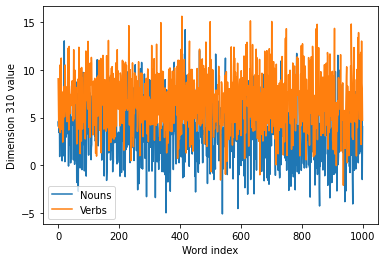

In [80]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '310'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '310'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 310 value')
plt.legend()

We can notice that most of the values in this dimension for both verbs and nouns are positive.

Outlier for verbs:

In [81]:
unique_freq_v_we.loc[:, '310'].sort_values()[-20:]

attaquer       12.868385
défendre       12.896739
appeler        12.964840
excuser        12.990805
diriger        12.995615
rappelle       13.064742
combattre      13.290698
expliqué       13.366587
concentrer     13.886807
respecter      14.271052
résoudre       14.294363
réunis         14.326883
tenir          14.607756
insiste        14.751368
rappelé        14.782020
présenter      14.927400
assurer        15.029619
mener          15.047261
reconnaître    15.109888
rappeler       15.593991
Name: 310, dtype: float64

We can see a significant number of infinitives in these maximum values for the verbs in dimension 310.

Now we can have a look at the lowest values in the dimension for nouns:

In [82]:
unique_freq_v_we.loc[:, '310'].sort_values()[:20]

piqué       -2.088387
rêvé        -1.538719
monté       -0.993989
serons      -0.932048
fermé       -0.672738
réfléchis   -0.025025
finis        0.046858
ailles       0.262939
utilisé      0.423928
seras        0.487344
pourvu       0.574190
allés        0.704278
vus          0.723557
mangez       0.894357
pensé        0.962764
irez         0.980034
allume       0.995892
aurais       1.008486
commandé     1.009174
auriez       1.026092
Name: 310, dtype: float64

Here we can see a mix of forms, howver, we don't seem to see any infinitive forms.

Nouns with the lowest value in the dimension:

In [83]:
unique_freq_n_we.loc[:, '310'].sort_values()[:20]

lunettes    -5.083002
demain      -4.969532
juifs       -4.517591
étrangers   -4.254983
messages    -4.040105
voeux       -3.803348
objets      -3.401867
meilleur    -3.372919
noirs       -3.322743
idées       -3.279242
mensonges   -3.016910
lapin       -2.982962
oreilles    -2.786221
filles      -2.717664
cartes      -2.705096
nuages      -2.682483
collier     -2.669886
têtes       -2.620975
puce        -2.561149
histoires   -2.560154
Name: 310, dtype: float64

We can see a significant number of plural forms of nouns in the minimum values of the dimension for nouns.

In [84]:
unique_freq_n_we.loc[:, '310'].sort_values()[-20:]

soutien         9.944751
situation       9.967330
contraire      10.116773
ministère      10.354539
époque         10.524783
colonel        10.629621
rôle           10.761567
arrêt          10.780378
mandat         10.880356
patrie         10.936634
général        11.045178
faveur         11.212240
comité         11.505790
article        11.632575
détail         11.645336
direction      11.658642
commission     11.704790
ministre       12.018818
nom            13.014243
commissaire    14.191738
Name: 310, dtype: float64

In the highest values we don't seem to see the plural noun forms.

### Dimension 341

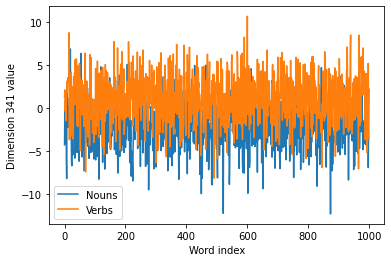

In [85]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '341'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '341'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 341 value')
plt.legend()

Verbs with minimum values:

In [86]:
unique_freq_v_we.loc[:, '341'].sort_values()[:20]

fumer        -8.108139
laissez      -7.393835
éteindre     -7.033858
range        -6.858156
ouvrez       -6.326445
fermé        -5.847817
allume       -5.806985
ouvert       -5.631483
restons      -5.582978
appartient   -5.486854
laissée      -5.401712
devez        -5.378696
rêvé         -5.125795
semblez      -5.103307
suivez       -5.044478
pouvez       -4.917494
feriez       -4.853813
aimez        -4.838287
entrez       -4.831566
cherchez     -4.793342
Name: 341, dtype: float64

Verbs with maximum values:

In [87]:
unique_freq_v_we.loc[:, '341'].sort_values()[-20:]

seras         6.501437
découvre      6.542109
trouvera      6.552543
apprendre     6.560469
pourrons      6.660382
parlera       6.748144
imagine       6.749920
viendront     6.978506
monte         6.985057
prépare       7.073811
irons         7.096084
vus           7.293647
verras        7.387590
met           7.693519
appris        7.706589
apprends      8.224072
menacé        8.464701
mettra        8.479979
vas           8.741084
apprend      10.655457
Name: 341, dtype: float64

We can see a high number of future forms in the maximum values of the dimension for verbs.

Now we can have a look at nouns. The maximum values for nouns:

In [88]:
unique_freq_n_we.loc[:, '341'].sort_values()[-20:]

dommage       3.474813
bateau        3.516833
patience      3.518557
pardon        3.555298
cirque        3.615766
dossier       3.652473
mamie         3.720312
professeur    3.834080
lien          3.988438
demain        4.205653
procureur     4.238091
maire         4.563721
cieux         4.684817
retard        4.786778
lycée         4.960897
ministre      4.992846
mission       5.063880
spectacle     5.148606
papa          6.343891
maman         6.857438
Name: 341, dtype: float64

And minimum values:

In [89]:
unique_freq_n_we.loc[:, '341'].sort_values()[:20]

rayon        -12.251479
essence      -12.176056
cigarette     -9.908346
opinion       -9.853559
chaussures    -9.463488
cigarettes    -9.329203
moteur        -9.156714
quart         -9.042901
manteau       -8.887268
pantalon      -8.822412
chemise       -8.801095
robe          -8.428322
feux          -8.315781
arrière       -8.234684
esprit        -8.226138
homme         -8.153903
queue         -8.125231
milliers      -8.076147
veste         -8.040111
religion      -8.029559
Name: 341, dtype: float64

There doesn't appear to be an obvious grouping for nouns in this dimension.

### Dimension 480

Description of values of dimension 480 for nouns:

In [90]:
unique_freq_n_we.loc[:, '480'].describe()

count    1000.000000
mean        2.198822
std         2.832027
min        -6.480861
25%         0.240576
50%         2.288166
75%         4.082506
max        10.213790
Name: 480, dtype: float64

For verbs:

In [91]:
unique_freq_v_we.loc[:, '480'].describe()

count    1000.000000
mean       -1.352151
std         2.201861
min        -9.541465
25%        -2.867478
50%        -1.370539
75%         0.060908
max         5.370016
Name: 480, dtype: float64

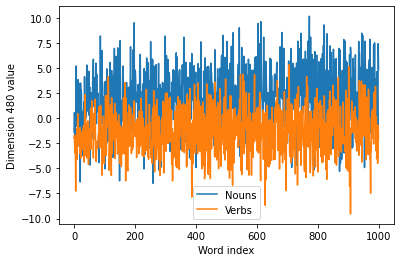

In [92]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '480'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '480'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 480 value')
plt.legend()

Let's have a look at nouns with the minimum values:

In [93]:
unique_freq_n_we.loc[:, '480'].sort_values()[:20]

présent         -6.480861
nom             -6.347413
nouveau         -6.232853
seule           -5.462959
règlement       -5.272700
seul            -5.179367
bienvenue       -5.119082
vent            -5.044795
lieu            -5.034687
chant           -4.906298
royaume         -4.901502
samedi          -4.898768
dimanche        -4.872899
permission      -4.793379
poule           -4.731320
suite           -4.664353
circonstances   -4.456377
cérémonie       -4.453503
instant         -4.421569
habits          -4.091128
Name: 480, dtype: float64

And nouns with maximum values:

In [94]:
unique_freq_n_we.loc[:, '480'].sort_values()[-20:]

kilos         7.912552
mensonges     8.123559
clés          8.125545
secrets       8.127202
chat          8.237673
bébé          8.239611
clinique      8.297504
veste         8.312120
tests         8.462896
bite          8.518302
roman         8.520989
études        8.583365
science       8.585458
écrivain      8.642861
haine         9.057456
détective     9.349487
labo          9.494498
peau          9.561861
vengeance     9.672227
foie         10.213790
Name: 480, dtype: float64

There don't appear to be a clear distinguishing factor for the nouns in the dimension.

Verbs with highest values in the dimension 480:

In [95]:
unique_freq_v_we.loc[:, '480'].sort_values()[-20:]

commandé    3.335189
ailles      3.359642
menti       3.410817
prévenir    3.448469
tirez       3.545007
tue         3.583520
coûte       3.618929
nettoyer    3.715465
perdez      3.726598
piqué       3.769479
couvre      3.774748
détruit     3.948001
jetez       4.102099
arrêtez     4.166961
fatiguée    4.186472
fatigué     4.358460
protège     4.363995
utilisé     4.432634
rempli      5.192020
levez       5.370016
Name: 480, dtype: float64

And the lowest values:

In [96]:
unique_freq_v_we.loc[:, '480'].sort_values()[:20]

réunis       -9.541465
prier        -8.676607
étions       -7.862647
accueillir   -7.479785
es           -7.257606
inviter      -7.211152
participer   -6.805292
joindre      -6.670277
refuser      -6.652164
sentir       -6.245357
étiez        -6.241361
allés        -6.217839
voyait       -6.111190
exprimer     -6.086957
amuser       -6.031622
appartient   -6.000920
partager     -5.988522
vivait       -5.899214
approcher    -5.745954
entrer       -5.704749
Name: 480, dtype: float64

There doesn't seem to be a clear classification of the verbs as well.

### Dimension 462

Values of dimension 462 for nouns:

In [97]:
unique_freq_n_we.loc[:, '462'].describe()

count    1000.000000
mean        2.328305
std         2.174567
min        -4.269458
25%         0.815122
50%         2.279358
75%         3.758622
max        10.209997
Name: 462, dtype: float64

For verbs:

In [98]:
unique_freq_v_we.loc[:, '462'].describe()

count    1000.000000
mean       -0.555269
std         1.919721
min        -6.917808
25%        -1.842913
50%        -0.603646
75%         0.584445
max         6.429501
Name: 462, dtype: float64

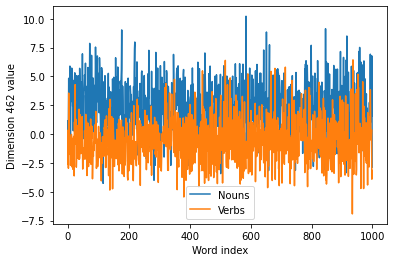

In [99]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '462'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '462'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 462 value')
plt.legend()

Verbs wuth maximum values in the dimension:

In [100]:
unique_freq_v_we.loc[:, '462'].sort_values()[-20:]

réveille    4.029375
coupez      4.033271
commandé    4.041405
suit        4.270710
eu          4.283330
aie         4.380064
arrangé     4.484571
servent     4.539263
née         4.624423
réalisé     4.650867
né          4.746367
rêvé        4.866822
reçoit      5.188426
appelée     5.218189
couvre      5.431526
comprend    5.478610
chargé      5.692601
marie       5.797937
concerne    6.385518
piqué       6.429501
Name: 462, dtype: float64

Agaign we're seeing a lot of participe passé in the verbs that have values more similar to nouns.

Verbs with minimum values:

In [101]:
unique_freq_v_we.loc[:, '462'].sort_values()[:20]

renoncer     -6.917808
refuse       -5.451680
veulent      -4.849559
parie        -4.814689
montrer      -4.742959
prêter       -4.720151
rappelé      -4.712235
désirez      -4.642494
accepter     -4.581428
prête        -4.554100
désire       -4.474217
travaillez   -4.467636
pouvons      -4.444123
expliqué     -4.410753
cherchent    -4.329335
croient      -4.327053
livrer       -4.296925
fumer        -4.289995
voulons      -4.258634
survivre     -4.244107
Name: 462, dtype: float64

Nouns with the maximum values in the dimension:

In [102]:
unique_freq_n_we.loc[:, '462'].sort_values()[-20:]

trouille      6.920522
type          6.953408
acte          7.027479
lait          7.076558
ingénieur     7.153214
actes         7.165229
garçons       7.254890
lapin         7.284745
boîte         7.395847
anneau        7.508364
chien         7.538063
anges         7.690896
oeufs         7.737548
école         7.859353
fleurs        7.974960
ailes         8.496843
moteur        8.843773
agent         9.024332
bleu          9.126848
unité        10.209997
Name: 462, dtype: float64

In [103]:
unique_freq_n_we.loc[:, '462'].sort_values()[:20]

faim           -4.269458
gouvernement   -4.003902
milliers       -3.427987
siècles        -3.362742
prêt           -3.166293
centaines      -3.134314
souffrance     -3.088076
misère         -2.869469
réputation     -2.801886
nourriture     -2.742906
réalité        -2.711168
dommage        -2.697803
cigarette      -2.616531
nouvelles      -2.496075
permission     -2.383769
santé          -2.374705
douleur        -2.157844
qualité        -2.070296
troupes        -2.051054
nouvelle       -2.044007
Name: 462, dtype: float64

There doesn't seem to be an easy classification for nouns in this dimension.

# Results



We can now perform a test by adding more PoS: adjectives, adverbs and seeing whether or not any of the dimensions remain strongly correlated to the PoS information.

# Adding adjectives and adverbs

In [104]:
top_freq_adj = pd.read_csv('Most Frequent Words/freq_ADJ.csv', index_col=0)[:1000]

In [105]:
top_freq_adj['cgram'] = 'ADJ'
top_freq_adj

,lemme,cgram,freq
Word,,,
mon,mon,ADJ,3848.99
ce,ce,ADJ,2739.25
ma,ma,ADJ,2346.90
cette,cette,ADJ,1902.27
votre,votre,ADJ,1894.09
...,...,...,...
marin,marin,ADJ,5.40
perdus,perdu,ADJ,5.39
étudiant,étudiant,ADJ,5.39


In [106]:
from we import *

model, tokenizer, log = initiate_model()

/Users/egoliakova/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [107]:
adj_we = create_words_df(model, tokenizer, top_freq_adj[~top_freq_adj.index.isin(top_freq_n.index)].index)

In [108]:
unique_freq_adj_we = adj_we.merge(top_freq_adj, left_index=True, right_index=True)
unique_freq_adj_we.columns = list(map(lambda x: str(x), unique_freq_adj_we.columns))

We can add encoding of 'ADJ' as PoS as `pos = 2`:

In [109]:
unique_freq_adj_we['pos'] = 2
unique_freq_adj_we

,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,lemme,cgram,freq,pos
absent,-0.133797,-7.267576,0.483826,-1.668857,7.979072,-4.277437,-1.145080,-0.571951,4.049406,-3.149042,...,-0.561165,-5.142469,-6.883100,-4.334402,2.554219,-0.866412,absent,ADJ,9.46,2
absolu,4.933391,-1.820655,1.532478,-1.979795,1.728292,0.517361,-2.229984,4.105628,-2.711453,1.507046,...,-0.999988,-3.802394,-0.709234,-3.994629,1.213610,-1.900828,absolu,ADJ,8.55,2
absolue,4.234381,-0.431358,-0.230961,-0.056044,0.191299,0.593049,-3.839259,2.989963,-1.278115,-0.350125,...,-0.003822,-2.327732,-1.106974,-3.103743,-0.077974,-2.705171,absolu,ADJ,8.44,2
absurde,3.756803,1.015494,0.616596,-1.308431,3.019945,4.145076,-0.925479,-0.032260,0.841586,5.597266,...,-0.109983,-0.612023,-4.347472,-1.936714,5.816693,4.032070,absurde,ADJ,21.56,2
accro,2.483311,2.564316,2.450794,0.317622,0.960546,-5.047524,-2.912201,-2.265557,-0.271045,4.769103,...,-5.210542,-4.113883,-3.342281,0.034384,3.217093,0.243652,accro,ADJ,6.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étranges,0.135948,-2.724816,2.355129,4.514741,2.288908,-3.565652,-3.753523,1.620154,-2.034898,4.304150,...,0.261487,2.025450,-3.169602,-3.013140,4.914901,4.011208,étrange,ADJ,14.61,2
étrangère,-0.528358,-5.020804,7.048703,-4.285672,-0.846370,-5.188326,-1.694803,1.685176,0.840575,-0.250530,...,-1.258980,-7.150950,-3.155275,-5.170597,1.406956,-3.189593,étranger,ADJ,7.25,2
étroit,5.570940,-0.225175,7.052871,0.215390,-0.176270,-0.370587,-3.874887,-2.445458,4.617943,1.282627,...,1.103106,-0.384914,-2.918136,1.870697,2.147427,-0.903518,étroit,ADJ,5.94,2
étudiant,4.405126,-5.698966,6.166831,-2.713313,-7.252870,-5.252601,0.710367,4.577788,-1.209978,-1.291935,...,3.479017,-1.852687,-1.904442,-0.141250,0.100240,-3.073529,étudiant,ADJ,5.39,2


Now adding adverbs:

In [110]:
top_freq_adv = pd.read_csv('Most Frequent Words/freq_ADV.csv', index_col=0)[:1000]

In [111]:
adv_we = create_words_df(model, tokenizer, top_freq_adv[~top_freq_adv.index.isin(top_freq_n.index)].index)
adv_we

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
ne,-2.281668,-1.370962,-0.403685,-0.073815,0.837571,-0.220982,-5.014138,0.451976,1.381517,2.327595,...,-2.500302,-2.513185,0.119819,-1.138245,-1.521283,-3.855268,-3.555737,-3.946141,2.373042,-0.525675
n',-3.097368,-1.079689,0.067284,-3.135941,0.706760,1.007909,-5.346002,1.035985,-2.897622,1.616330,...,0.778125,-2.123144,-1.224010,-3.846741,-2.123554,-4.506597,-2.959948,-2.108817,-0.951543,1.712145
plus,-3.509048,-2.220096,1.762023,-0.791895,-2.215525,-1.303401,-1.088937,-0.509107,-2.603570,3.042406,...,1.016149,0.066032,-1.052608,-1.366760,-1.228347,-1.889529,-3.330955,-3.745218,-2.395585,2.763508
non,-0.901459,0.141983,0.007060,-0.111694,-3.179225,-2.742811,-2.064522,5.242306,1.317355,0.784740,...,-2.486995,5.093327,-0.548959,-5.884063,-1.185891,-2.279094,0.086449,-6.897130,-5.919256,-2.573891
oui,-0.190804,-2.808609,-4.134501,-3.949662,2.444155,-5.813464,-3.623935,3.731077,-4.294740,-2.152137,...,-2.282243,3.806279,-1.384501,-6.089664,2.575834,-4.809360,0.575666,-4.684238,-5.211657,-5.063492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
indifféremment,3.698070,0.750454,4.030900,2.746018,2.450556,-2.135656,3.902123,-4.224880,0.672257,1.339097,...,-5.022931,2.152066,0.097017,1.411255,-2.504311,0.391117,-4.566370,-1.765620,-2.135185,0.503560
unanimement,6.566344,0.474527,1.193370,3.672653,-2.865468,3.709781,2.072994,1.386768,-2.158478,-5.487871,...,-0.330759,-3.893902,-1.668443,-2.047518,0.459205,-6.713665,-3.687281,-4.375744,-4.649663,-2.764599
uniformément,3.660331,-5.571579,6.717713,2.930643,3.971225,1.817775,-2.462814,4.685553,3.029170,1.528087,...,-8.120213,1.101425,-6.881276,0.581457,3.910207,-2.364698,-3.340010,-5.855249,-9.934072,6.571452
administrativement,6.863128,-1.973257,4.921699,3.398282,3.391831,0.740093,-5.003545,-1.229901,0.880966,-3.772704,...,0.321678,-1.970414,0.889980,3.716942,2.336884,-7.139643,0.275380,0.541034,-2.205746,-0.787146


In [112]:
unique_freq_adv_we = adv_we.merge(top_freq_adv, left_index=True, right_index=True)
unique_freq_adv_we.columns = list(map(lambda x: str(x), unique_freq_adv_we.columns))

Now we can encode adverbs' PoS as `3`:

In [113]:
unique_freq_adv_we['pos'] = 3

Now we can combine all 4 PoS together in one DataFrame:

In [114]:
unique_nvaa_we = pd.concat([unique_freq_adj_we, unique_freq_adv_we, unique_freq_n_we, unique_freq_v_we])

In [115]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvaa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
165,0.272062,1.0,0.272062
318,0.272152,1.0,0.272152
157,-0.279972,-1.0,0.279972
208,-0.282273,-1.0,0.282273
111,0.283783,1.0,0.283783
50,0.285928,1.0,0.285928
284,0.286520,1.0,0.286520
469,-0.292140,-1.0,0.292140
195,-0.294605,-1.0,0.294605
371,-0.296356,-1.0,0.296356


The correlation between PoS encoding and the dimensions is much less stronger if we compare all 4 PoS together. However, if we compare the results in triples we can see much closer correlated dimensions. First, comparing nouns, adjectives and verbs:

In [116]:
unique_nvadj_we = pd.concat([unique_freq_adj_we, unique_freq_n_we, unique_freq_v_we])

In [117]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvadj_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
240,0.300671,1.0,0.300671
222,-0.301206,-1.0,0.301206
220,-0.303581,-1.0,0.303581
286,0.312886,1.0,0.312886
110,0.315301,1.0,0.315301
127,-0.319986,-1.0,0.319986
198,0.320638,1.0,0.320638
199,0.320870,1.0,0.320870
479,-0.324124,-1.0,0.324124
182,-0.324763,-1.0,0.324763


Firs of all, previously seen dimension `480` appears again and a new dimension `89` emerges which can be hypothesized to encode more information about adjectives than other dimensions. 

Now we can compare nouns, adverbs and verbs:

In [118]:
unique_nvadv_we = pd.concat([unique_freq_adv_we, unique_freq_n_we, unique_freq_v_we])

In [119]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvadv_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
140,0.308782,1.0,0.308782
284,0.311995,1.0,0.311995
156,-0.312122,-1.0,0.312122
3,0.312439,1.0,0.312439
390,-0.313840,-1.0,0.313840
280,-0.314464,-1.0,0.314464
399,-0.318587,-1.0,0.318587
50,0.325000,1.0,0.325000
76,0.332316,1.0,0.332316
469,-0.336581,-1.0,0.336581


The correlation here is stronger but still much lower (and none of the previously studied dimensions appear again), this can be explained that adverbness and noun-ness are encoded in different dimensions.

Now if we compare adverbs, adjectives and verbs:

In [120]:
unique_vaa_we = pd.concat([unique_freq_adv_we, unique_freq_adj_we, unique_freq_v_we])

In [121]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_vaa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
52,0.330350,1.0,0.330350
157,-0.330920,-1.0,0.330920
165,0.331887,1.0,0.331887
208,-0.334871,-1.0,0.334871
222,-0.341537,-1.0,0.341537
280,-0.343371,-1.0,0.343371
371,-0.346923,-1.0,0.346923
282,0.348837,1.0,0.348837
393,-0.355493,-1.0,0.355493
401,-0.356062,-1.0,0.356062


The correlations become stronger in comparison to nouns, however, are still weaker than Nouns vs Verbs. We can compare in general correlation of adverbs with other PoS in pairs, starting with verbs and adverbs:

In [122]:
unique_va_we = pd.concat([unique_freq_adv_we, unique_freq_v_we])

In [123]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_va_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
195,-0.393855,-1.0,0.393855
3,0.394152,1.0,0.394152
280,-0.394256,-1.0,0.394256
140,0.394630,1.0,0.394630
399,-0.394643,-1.0,0.394643
371,-0.395918,-1.0,0.395918
50,0.408088,1.0,0.408088
390,-0.415170,-1.0,0.415170
76,0.418972,1.0,0.418972
208,-0.421283,-1.0,0.421283


Now for adjectives and adverbs:

In [124]:
unique_aa_we = pd.concat([unique_freq_adj_we, unique_freq_adv_we])

In [125]:
unique_freq_adv_we

,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,lemme,cgram,freq,pos
ne,-2.281668,-1.370962,-0.403685,-0.073815,0.837571,-0.220982,-5.014138,0.451976,1.381517,2.327595,...,-1.521283,-3.855268,-3.555737,-3.946141,2.373042,-0.525675,ne,ADV,13357.03,3
n',-3.097368,-1.079689,0.067284,-3.135941,0.706760,1.007909,-5.346002,1.035985,-2.897622,1.616330,...,-2.123554,-4.506597,-2.959948,-2.108817,-0.951543,1.712145,ne,ADV,8860.45,3
plus,-3.509048,-2.220096,1.762023,-0.791895,-2.215525,-1.303401,-1.088937,-0.509107,-2.603570,3.042406,...,-1.228347,-1.889529,-3.330955,-3.745218,-2.395585,2.763508,plus,ADV,4062.45,3
non,-0.901459,0.141983,0.007060,-0.111694,-3.179225,-2.742811,-2.064522,5.242306,1.317355,0.784740,...,-1.185891,-2.279094,0.086449,-6.897130,-5.919256,-2.573891,non,ADV,4040.18,3
oui,-0.190804,-2.808609,-4.134501,-3.949662,2.444155,-5.813464,-3.623935,3.731077,-4.294740,-2.152137,...,2.575834,-4.809360,0.575666,-4.684238,-5.211657,-5.063492,oui,ADV,3207.35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
indifféremment,3.698070,0.750454,4.030900,2.746018,2.450556,-2.135656,3.902123,-4.224880,0.672257,1.339097,...,-2.504311,0.391117,-4.566370,-1.765620,-2.135185,0.503560,indifféremment,ADV,0.06,3
unanimement,6.566344,0.474527,1.193370,3.672653,-2.865468,3.709781,2.072994,1.386768,-2.158478,-5.487871,...,0.459205,-6.713665,-3.687281,-4.375744,-4.649663,-2.764599,unanimement,ADV,0.06,3
uniformément,3.660331,-5.571579,6.717713,2.930643,3.971225,1.817775,-2.462814,4.685553,3.029170,1.528087,...,3.910207,-2.364698,-3.340010,-5.855249,-9.934072,6.571452,uniformément,ADV,0.06,3
administrativement,6.863128,-1.973257,4.921699,3.398282,3.391831,0.740093,-5.003545,-1.229901,0.880966,-3.772704,...,2.336884,-7.139643,0.275380,0.541034,-2.205746,-0.787146,administrativement,ADV,0.05,3


In [126]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_aa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
63,0.336348,1.0,0.336348
390,-0.347735,-1.0,0.347735
352,0.352132,1.0,0.352132
144,0.359310,1.0,0.359310
137,-0.360111,-1.0,0.360111
143,0.361613,1.0,0.361613
360,0.366354,1.0,0.366354
347,-0.367152,-1.0,0.367152
25,0.367808,1.0,0.367808
153,-0.372988,-1.0,0.372988


Correlation with adjectives seems to be much weaker.

# Conclusion

We have found a list of dimensions correlated to Verb-Noun PoS information:  

We have found a group of dimension correlated with PoS information **for verbs and nouns**:'29', '159', '192', '198', '282', '310', '341', '401', '462', '480'. Dimension **462**, **480** and **159** seem to be the closest to represent Noun<->Verb PoS. However, none of the dimension seem to represent PoS information only: the outliers don't appear to be ambiguous words that can be attributed to multiple parts of speech but in general quite regular looking nouns/verbs.

Several points for further inverstigation:
- Since the PoS information doesn't seem to be directly corresponding to any of the dimension, we can assume that PoS is retrieved from co-occurence information: e.g. nouns co-occuring with articles, verbs co-occuring with pronouns like je/il/...
- We have observed that for several of the dimensions with the highest correlation to PoS information, mean for values of the dimension for verbs is relatively close to 0: 159, 212, 51, 198 which can be potentially interesting to investigate: the closeness of dimension values to 0 on average.
- Dimension `480` remained strongly correlated with PoS with adding **adjectives** into experiment, making it the prime candidat for encoding verb-ness, noun-ness and adjective-ness.
- PoS information for nouns/adj and adverbs seems less correlated, meaning that there is less likely to be an axis embedding all PoS. In [this work](https://arxiv.org/pdf/1906.00114.pdf) it's shown that there is a PCA component representing the Verb/Noun axis and Noun/Adjective axis and this is confirmed by what we're seeing: the adverbs seem to be encoded in a way that is not direcly oppositional to nouns. 